In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class FCN(nn.Module):
    "Defines a fully-connected network in PyTorch"
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])
        self.fch = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(N_HIDDEN, N_HIDDEN),
                            activation()]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)
    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x

In [5]:
# analytical solution
def exact_solution(x, omega):
    return (1 / omega) * torch.sin(omega * x)

# residual cost
def pinn_loss(model, x, omega):
    u = model(x)
    dudx = torch.autograd.grad(u, x, torch.ones_like(u), create_graph=True)[0]
    physics_loss = torch.mean((dudx - torch.cos(omega * x)) ** 2)
    return physics_loss

# beginning condition cost
def boundary_loss(model):
    u0 = model(torch.tensor([[0.0]], dtype=torch.float32))
    return u0 ** 2

In [8]:
N_INPUT = 1
N_OUTPUT = 1
LR = 0.001
EPOCHS = 50000

#### a)

In [6]:
OMEGA = 1.0
N_HIDDEN = 16
N_LAYERS = 2
TRAINING_POINTS = 200
TESTING_POINTS = 1000

x_train = torch.linspace(-2 * np.pi, 2 * np.pi, TRAINING_POINTS).view(-1, 1).requires_grad_(True)
x_test = torch.linspace(-2 * np.pi, 2 * np.pi, TESTING_POINTS).view(-1, 1)
u_exact = exact_solution(x_test, OMEGA)

model = FCN(N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [35]:
loss_a = np.empty(EPOCHS)

for epoch in range(EPOCHS + 1):
    optimizer.zero_grad()
    physics_loss = pinn_loss(model, x_train, OMEGA)
    bc_loss = boundary_loss(model)
    loss = physics_loss + bc_loss
    np.append(loss_a, loss.item())
    loss.backward()
    optimizer.step()

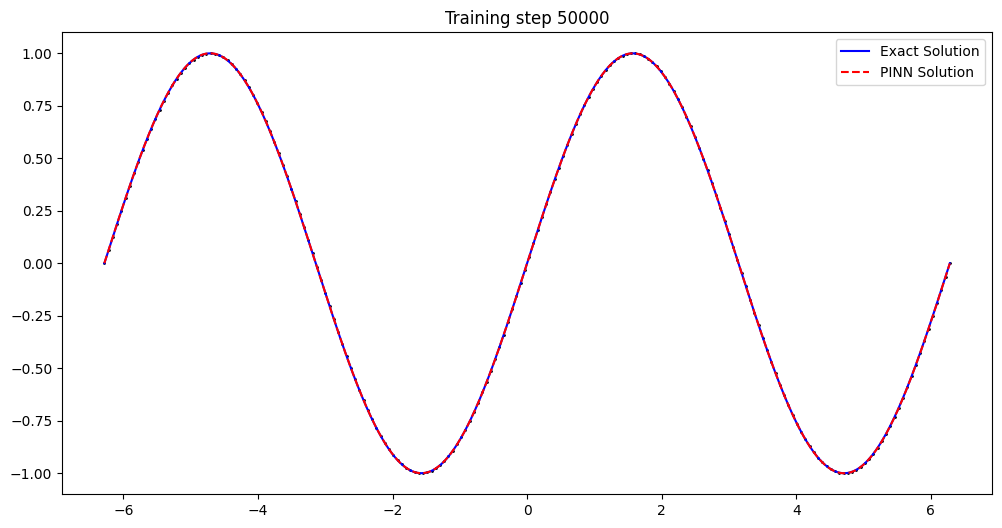

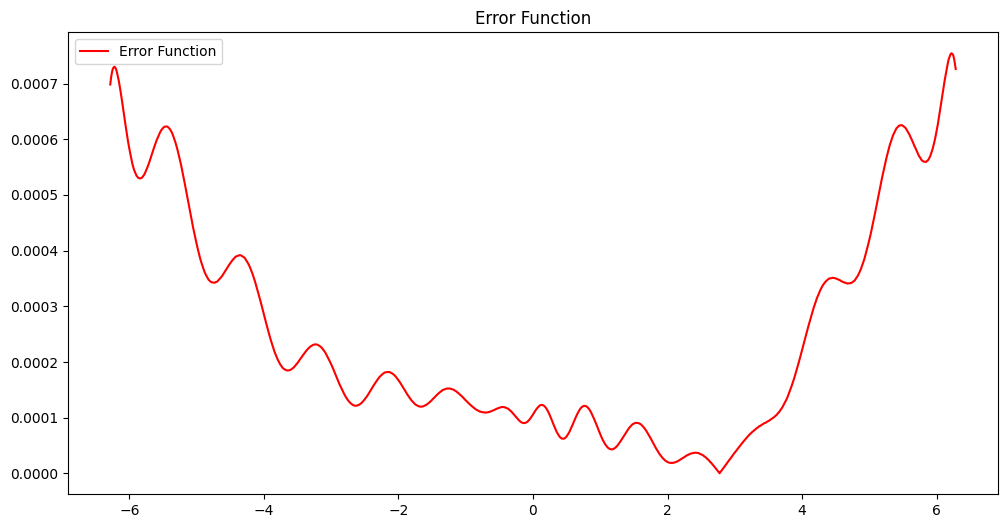

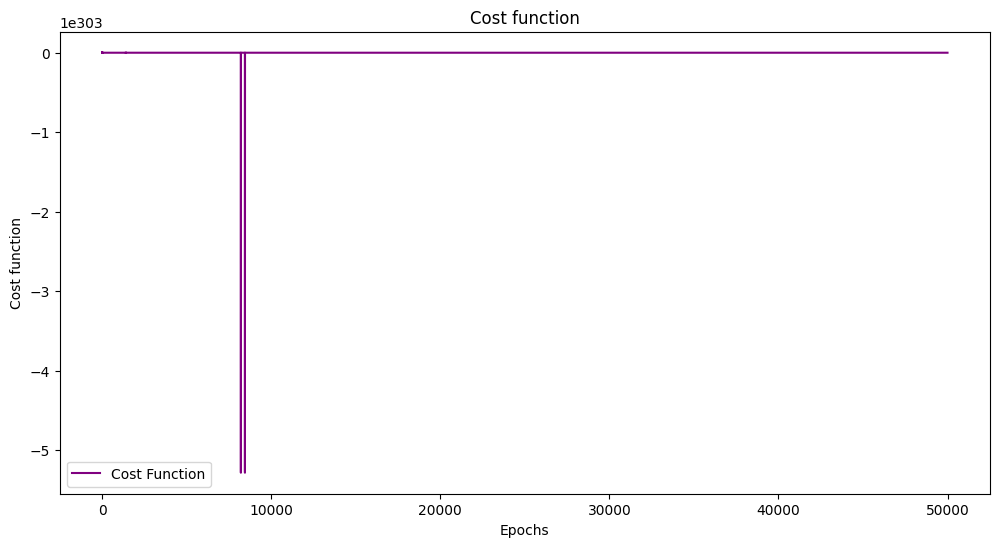

In [37]:
with torch.no_grad():
    
    # solution plot
    u_pred = model(x_test).detach()
    plt.figure(figsize=(12, 6))
    plt.plot(x_test.numpy(), u_exact.numpy(), label='Exact Solution', color='blue')
    plt.plot(x_test.numpy(), u_pred.numpy(), label='PINN Solution', color='red', linestyle='dashed')
    plt.scatter(x_train.detach().numpy(), model(x_train).detach().numpy(), color='black', s=1)
    plt.title(f'Training step {epoch}')
    plt.legend()
    plt.show()
    
    # error function plot
    plt.figure(figsize=(12, 6))
    plt.plot(x_test.numpy(), abs((u_exact.numpy()-u_pred.numpy())).reshape(-1,1), label='Error Function', color='red')
    plt.title('Error Function')
    plt.legend()
    plt.show()
    
    # loss function plot
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(EPOCHS), loss_a, label='Cost Function', color='purple')
    plt.title('Cost function')
    plt.xlabel('Epochs')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()

#### b)

In [38]:
OMEGA = 15
TRAINING_POINTS = 3000
TESTING_POINTS = 5000

x_train = torch.linspace(-2 * np.pi, 2 * np.pi, TRAINING_POINTS).view(-1, 1).requires_grad_(True)
x_test = torch.linspace(-2 * np.pi, 2 * np.pi, TESTING_POINTS).view(-1, 1)
u_exact = exact_solution(x_test, OMEGA)

##### 1)

In [40]:
N_HIDDEN = 16
N_LAYERS = 2

model = FCN(N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [ ]:
loss_b = np.empty(EPOCHS)

for epoch in range(EPOCHS + 1):
    optimizer.zero_grad()
    physics_loss = pinn_loss(model, x_train, OMEGA)
    bc_loss = boundary_loss(model)
    loss = physics_loss + bc_loss
    np.append(loss_b, loss.item())
    loss.backward()
    optimizer.step()

In [ ]:
with torch.no_grad():
    
    # solution plot
    u_pred = model(x_test).detach()
    plt.figure(figsize=(12, 6))
    plt.plot(x_test.numpy(), u_exact.numpy(), label='Exact Solution', color='blue')
    plt.plot(x_test.numpy(), u_pred.numpy(), label='PINN Solution', color='red', linestyle='dashed')
    plt.scatter(x_train.detach().numpy(), model(x_train).detach().numpy(), color='black', s=1)
    plt.title(f'Training step {epoch}')
    plt.legend()
    plt.show()
    
    # error function plot
    plt.figure(figsize=(12, 6))
    plt.plot(x_test.numpy(), abs((u_exact.numpy()-u_pred.numpy())).reshape(-1,1), label='Error Function', color='red')
    plt.title('Error Function')
    plt.legend()
    plt.show()
    
    # loss function plot
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(EPOCHS), loss_b, label='Cost Function', color='purple')
    plt.title('Cost function')
    plt.xlabel('Epochs')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()